In [1]:
#####FINAL #####
# This script pulls in Diabetes Patient Datasets from UCL ML Repository, with a focus on building and testing classification models that will 
# determine which patients are at highest risk of an avoidable hospital admission, given the features available in the datasets. 

<img src="ClassificationModeling.png" style="width:1000px; height:300px" />

In [149]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(utils)
library(base)
install.packages("broom"); library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("vtreat"); library(vtreat)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [151]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
install.packages("mlbench"); library(mlbench)
install.packages("yardstick"); library(yardstick)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.

Attaching package: 'yardstick'

The following objects are masked from 'package:Metrics':

    accuracy, mae, mape, mase, precision, recall, rmse, smape


ERROR: Error in library(brotools): there is no package called 'brotools'


In [346]:
install.packages("e1071")
install.packages("caTools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency 'bitops'

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [372]:
install.packages("vip")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [402]:
install.packages("rsample"); library(rsample)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [407]:
install.packages("tune")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [409]:
install.packages("dials")
install.packages("infer")
install.packages("modeldata")
install.packages("recipes")
install.packages("workflow")
install.packages("yardstick")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
"package 'workflow' is not available (for R version 3.6.1)"Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [416]:
install.packages("pROC"); library(pROC)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:Metrics':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var



In [419]:
install.packages("AUC"); library(AUC)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.

Attaching package: 'AUC'

The following objects are masked from 'package:pROC':

    auc, roc

The following objects are masked from 'package:yardstick':

    accuracy, sensitivity, specificity

The following objects are masked from 'package:Metrics':

    accuracy, auc

The following objects are masked from 'package:caret':

    sensitivity, specificity



In [452]:
install.packages("caret"); library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
# DEFINE HELPER FUNCTIONS

In [17]:
# 1
load_file <- function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}

print(load_file)

function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}


In [10]:
#Loading files

In [426]:
D1 <- load_file("data-01")
D1$pid <- c("D1")
head(D1)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1


In [427]:
D2 <- load_file("data-02")
D2$pid <- c("D2")

In [428]:
D3 <- load_file("data-03")
D3$pid <- c("D3")

In [429]:
D4 <- load_file("data-04")
D4$pid <- c("D4")

In [430]:
D5 <- load_file("data-05")
D5$pid <- c("D5")

In [431]:
D6 <- load_file("data-06")
D6$pid <- c("D6")

In [26]:
D7 <- load_file("data-07")
D7$pid <- c("D7")

In [27]:
D8 <- load_file("data-08")
D8$pid <- c("D8")

In [28]:
D9 <- load_file("data-09")
D9$pid <- c("D9")

In [30]:
D10 <- load_file("data-10")
D10$pid <- c("D10")

In [32]:
D11 <- load_file("data-11")
D11$pid <- c("D11")

In [33]:
D12 <- load_file("data-12")
D12$pid <- c("D12")

In [34]:
D13 <- load_file("data-13")
D13$pid <- c("D13")

In [36]:
D14 <- load_file("data-14")
D14$pid <- c("D14")

In [38]:
D15 <- load_file("data-15")
D15$pid <- c("D15")

In [39]:
D16 <- load_file("data-16")
D16$pid <- c("D16")

In [40]:
D17 <- load_file("data-17")
D17$pid <- c("D17")

In [41]:
D18 <- load_file("data-18")
D18$pid <- c("D18")

In [42]:
D19 <- load_file("data-19")
D19$pid <- c("D19")

In [43]:
D20 <- load_file("data-20")
D20$pid <- c("D20")

In [44]:
D21 <- load_file("data-21")
D21$pid <- c("D21")

In [45]:
D22 <- load_file("data-22")
D22$pid <- c("D22")

In [46]:
D23 <- load_file("data-23")
D23$pid <- c("D23")

In [48]:
D24 <- load_file("data-24")
D24$pid <- c("D24")

In [49]:
D25 <- load_file("data-25")
D25$pid <- c("D25")

In [50]:
D26 <- load_file("data-26")
D26$pid <- c("D26")

In [57]:
D28 <- load_file("data-28")
D28$pid <- c("D28")

In [60]:
D30 <- load_file("data-30")
D30$pid <- c("D30")

In [61]:
D31 <- load_file("data-31")
D31$pid <- c("D31")

In [62]:
D32 <- load_file("data-32")
D32$pid <- c("D32")

In [64]:
Diabetes_data <- rbind(D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, D16, D17, D18, D19, D20, D21, D22, D23, D24, D25, D26, D28, D30, D31, D32)

In [65]:
nrow(Diabetes_data)

[1] 12112

In [63]:
# EXPLORATORY DATA ANALYSIS

In [66]:
str(Diabetes_data)

'data.frame':	12112 obs. of  5 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: chr  "100" "9" "13" "119" ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...


In [81]:
sapply(Diabetes_data, class)

Date        Time        Code       Value         pid 
"character" "character"   "integer" "character" "character"

In [70]:
sum(is.na(Diabetes_data))

[1] 0

In [72]:
is.numeric(Diabetes_data)

[1] FALSE

In [76]:
filtered_Diabetes_data <- Diabetes_data %>%
    filter(is.numeric(Value))
nrow(filtered_Diabetes_data)

[1] 0

In [84]:
#Converted "Value" column from character to numeric
Diabetes_data$Value <- as.numeric(Diabetes_data$Value)

sapply(Diabetes_data, class)
str(Diabetes_data)

Date        Time        Code       Value         pid 
"character" "character"   "integer"   "numeric" "character"

'data.frame':	12112 obs. of  5 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...


In [89]:
# Conversion of Date column from character to "ymd" format

Diabetes_data2 <- Diabetes_data %>%
    mutate(date1 = mdy(Date)) %>%
    arrange(Code)

head(Diabetes_data2, nrow = 10)
str(Diabetes_data2)

Warning message:
"Problem with `mutate()` input `date1`.
i  7 failed to parse.
i Input `date1` is `mdy(Date)`."

Date,Time,Code,Value,pid,datetimes,date1
05-26-1991,06:00,4,0,D20,12-23-1989 22:00,1991-05-26
04-21-1991,9:09,33,9,D1,04-21-1991 9:09,1991-04-21
04-21-1991,17:08,33,7,D1,04-22-1991 13:40,1991-04-21
04-22-1991,7:35,33,10,D1,04-23-1991 17:25,1991-04-22
04-22-1991,13:40,33,2,D1,04-24-1991 12:00,1991-04-22
04-22-1991,16:56,33,7,D1,04-25-1991 7:29,1991-04-22


'data.frame':	12112 obs. of  7 variables:
 $ Date     : chr  "05-26-1991" "04-21-1991" "04-21-1991" "04-22-1991" ...
 $ Time     : chr  "06:00" "9:09" "17:08" "7:35" ...
 $ Code     : int  4 33 33 33 33 33 33 33 33 33 ...
 $ Value    : num  0 9 7 10 2 7 11 7 10 4 ...
 $ pid      : chr  "D20" "D1" "D1" "D1" ...
 $ datetimes: chr  "12-23-1989 22:00" "04-21-1991 9:09" "04-22-1991 13:40" "04-23-1991 17:25" ...
 $ date1    : Date, format: "1991-05-26" "1991-04-21" ...


In [91]:
#Conversion of Time column from character to datetime format
Diabetes_data2$datetime = paste(Diabetes_data2$Date, Diabetes_data2$Time)
Diabetes_data2$datetime = mdy_hm(Diabetes_data2$datetime)
head(Diabetes_data2, nrow = 5)

Warning message:
" 7 failed to parse."

Date,Time,Code,Value,pid,datetimes,date1,datetime
05-26-1991,06:00,4,0,D20,12-23-1989 22:00,1991-05-26,1991-05-26 06:00:00
04-21-1991,9:09,33,9,D1,04-21-1991 9:09,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,33,7,D1,04-22-1991 13:40,1991-04-21,1991-04-21 17:08:00
04-22-1991,7:35,33,10,D1,04-23-1991 17:25,1991-04-22,1991-04-22 07:35:00
04-22-1991,13:40,33,2,D1,04-24-1991 12:00,1991-04-22,1991-04-22 13:40:00
04-22-1991,16:56,33,7,D1,04-25-1991 7:29,1991-04-22,1991-04-22 16:56:00


In [97]:
Diabetes_data3 <- Diabetes_data2 %>%
    select(-datetimes)

str(Diabetes_data3)

'data.frame':	12112 obs. of  7 variables:
 $ Date    : chr  "05-26-1991" "04-21-1991" "04-21-1991" "04-22-1991" ...
 $ Time    : chr  "06:00" "9:09" "17:08" "7:35" ...
 $ Code    : int  4 33 33 33 33 33 33 33 33 33 ...
 $ Value   : num  0 9 7 10 2 7 11 7 10 4 ...
 $ pid     : chr  "D20" "D1" "D1" "D1" ...
 $ date1   : Date, format: "1991-05-26" "1991-04-21" ...
 $ datetime: POSIXct, format: "1991-05-26 06:00:00" "1991-04-21 09:09:00" ...


In [171]:
# Used code below to check which dataset Codes contained Values (discovered only those for Insulin and Glucose. No values associated with 
# Exercise activity, Meal ingestion etc)
Diabetes_data4 <- Diabetes_data3 %>%
    filter(Code == 72)

head(Diabetes_data4, n = 5)
nrow(Diabetes_data4)

Date,Time,Code,Value,pid,date1,datetime
08-16-1990,07:30,72,0,D3,1990-08-16,1990-08-16 07:30:00
08-16-1990,12:14,72,0,D3,1990-08-16,1990-08-16 12:14:00
08-16-1990,17:41,72,0,D3,1990-08-16,1990-08-16 17:41:00
08-24-1990,07:48,72,0,D3,1990-08-24,1990-08-24 07:48:00
08-24-1990,07:48,72,0,D4,1990-08-24,1990-08-24 07:48:00


[1] 50

In [98]:
#Filtering out Insulin doses and corresponding codes

target <- c(33, 34, 35)

Insulin_data <- Diabetes_data3 %>%
    filter(Code %in% target) %>%
    rename(Insulin_Code = Code, Insulin_dose = Value)

head(Insulin_data, n = 5)
nrow(Insulin_data)

Date,Time,Insulin_Code,Insulin_dose,pid,date1,datetime
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-22-1991,7:35,33,10,D1,1991-04-22,1991-04-22 07:35:00
04-22-1991,13:40,33,2,D1,1991-04-22,1991-04-22 13:40:00
04-22-1991,16:56,33,7,D1,1991-04-22,1991-04-22 16:56:00


[1] 6092

In [99]:
#Filtering out Glucose doses and corresponding codes

target1 <- c(48, 57, 58, 59, 60, 61, 62, 63, 64, 65)

Glucose_data <- Diabetes_data3 %>%
    filter(Code %in% target1) %>%
    rename(Glucose_Code = Code, Glucose_Value = Value)

head(Glucose_data, n = 5)
nrow(Glucose_data)

Date,Time,Glucose_Code,Glucose_Value,pid,date1,datetime
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00
04-24-1991,22:09,48,340,D1,1991-04-24,1991-04-24 22:09:00
04-25-1991,21:54,48,288,D1,1991-04-25,1991-04-25 21:54:00
04-28-1991,22:30,48,200,D1,1991-04-28,1991-04-28 22:30:00
04-29-1991,22:28,48,81,D1,1991-04-29,1991-04-29 22:28:00


[1] 5563

In [100]:
#Filtering out inappropriate Glucose values - "0Lo"
Inapprop_Glucose_data <- Glucose_data %>%
    filter(str_detect(Glucose_Value, "0Lo"))

head(Inapprop_Glucose_data, n = 5)
nrow(Inapprop_Glucose_data)

Date,Time,Glucose_Code,Glucose_Value,pid,date1,datetime


[1] 0

In [105]:
#Combine both tables for Insulin and Glucose values 
Diabetes_InsGlucose <- Insulin_data %>%
    inner_join(Glucose_data, by = c("pid", "datetime", "date1", "Date", "Time"))

head(Diabetes_InsGlucose, n = 5)
nrow(Diabetes_InsGlucose)

Date,Time,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119
04-22-1991,7:35,33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216
04-22-1991,16:56,33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211
04-23-1991,7:25,33,11,D1,1991-04-23,1991-04-23 07:25:00,58,257


[1] 3627

In [302]:
# FILTER OUT NA'S FROM GLUCOSE VALUES COLUMN

#Used which() and is.na() to create index of observations without a recorded Glucose Value
na_index <- which(is.na(Diabetes_InsGlucose$Glucose_Value))
na_index

#Compute median of Glucose Values
median_gluc <- median(Diabetes_InsGlucose$Glucose_Value, na.rm = TRUE)
median_gluc

#Make a copy of Diabetes Data
Diabetes_InsGlucose_replace <- Diabetes_InsGlucose

#Replace missing Glucose Values
Diabetes_InsGlucose_replace$Glucose_Value[na_index] <- median_gluc

#Check if NA's have been removed
summary(Diabetes_InsGlucose_replace)

#Rename the replaced Diabetes Data
Diabetes_InsGlucose3 <- Diabetes_InsGlucose_replace

[1] 379 396 399 403 405 412 599

[1] 154

     Date               Time            Insulin_Code    Insulin_dose  
 Length:3627        Length:3627        Min.   :33.00   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:33.00   1st Qu.: 5.00  
 Mode  :character   Mode  :character   Median :33.00   Median : 7.00  
                                       Mean   :33.27   Mean   :10.15  
                                       3rd Qu.:34.00   3rd Qu.:14.00  
                                       Max.   :34.00   Max.   :35.00  
                                                                      
     pid                date1               datetime                  
 Length:3627        Min.   :1988-07-13   Min.   :1988-07-13 08:00:00  
 Class :character   1st Qu.:1989-11-11   1st Qu.:1989-11-11 07:00:00  
 Mode  :character   Median :1991-01-16   Median :1991-01-16 12:30:00  
                    Mean   :1990-08-13   Mean   :1990-08-14 03:42:58  
                    3rd Qu.:1991-06-13   3rd Qu.:1991-06-13 16:57:30  
      

In [141]:
# FEATURE ENGINEERING 

In [303]:
# One hot encoding the "Code" column into individual variable columns for Insulin and Glucose
Diabetes_InsGlucose4 <- Diabetes_InsGlucose3 %>%
    mutate(Reg_Ins = ifelse(Insulin_Code == "33", 1, 0),
          Inter_Ins = ifelse(Insulin_Code == "34", 1, 0),
          LongAct_Ins = ifelse(Insulin_Code == "35", 1, 0),
          Unspec_Gluc = ifelse(Glucose_Code == "48" | Glucose_Code == "57", 1, 0),
          PreBreak_Gluc = ifelse(Glucose_Code == "58", 1, 0),
          PostBreak_Gluc = ifelse(Glucose_Code == "59", 1, 0),
          PreLun_Gluc = ifelse(Glucose_Code == "60", 1, 0),
          PostLun_Gluc = ifelse(Glucose_Code == "61", 1, 0),
          PreSup_Gluc = ifelse(Glucose_Code == "62", 1, 0),
          PostSup_Gluc = ifelse(Glucose_Code == "63", 1, 0),
          PreSnack_Gluc = ifelse(Glucose_Code == "64", 1, 0),
          Hypoglycaemia = ifelse(Glucose_Code == "65", 1, 0))

glimpse(Diabetes_InsGlucose4)

Rows: 3,627
Columns: 21
$ Date           <chr> "04-21-1991", "04-21-1991", "04-22-1991", "04-22-1991",~
$ Time           <chr> "9:09", "17:08", "7:35", "16:56", "7:25", "17:25", "7:5~
$ Insulin_Code   <int> 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,~
$ Insulin_dose   <dbl> 9, 7, 10, 7, 11, 7, 10, 5, 9, 7, 2, 9, 7, 10, 8, 10, 7,~
$ pid            <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "~
$ date1          <date> 1991-04-21, 1991-04-21, 1991-04-22, 1991-04-22, 1991-0~
$ datetime       <dttm> 1991-04-21 09:09:00, 1991-04-21 17:08:00, 1991-04-22 0~
$ Glucose_Code   <int> 58, 62, 58, 62, 58, 62, 58, 48, 58, 62, 48, 58, 62, 58,~
$ Glucose_Value  <dbl> 100, 119, 216, 211, 257, 129, 239, 340, 67, 206, 288, 7~
$ Reg_Ins        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ Inter_Ins      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ LongAct_Ins    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ Unspec_Gluc   

In [304]:
#One hot encode the "Glucose Value" column into either low (<= 40mg/dL) or high (>= 200mg/dL) values
Diabetes_InsGlucose5 <- Diabetes_InsGlucose4 %>%
    mutate(Low_HighGlucose = ifelse(Glucose_Value <= 40 | Glucose_Value >= 200, 1, 0))

head(Diabetes_InsGlucose5, n = 5)

Date,Time,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,Reg_Ins,...,Unspec_Gluc,PreBreak_Gluc,PostBreak_Gluc,PreLun_Gluc,PostLun_Gluc,PreSup_Gluc,PostSup_Gluc,PreSnack_Gluc,Hypoglycaemia,Low_HighGlucose
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,1,...,0,1,0,0,0,0,0,0,0,0
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,1,...,0,0,0,0,0,1,0,0,0,0
04-22-1991,7:35,33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,1,...,0,1,0,0,0,0,0,0,0,1
04-22-1991,16:56,33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,1,...,0,0,0,0,0,1,0,0,0,1
04-23-1991,7:25,33,11,D1,1991-04-23,1991-04-23 07:25:00,58,257,1,...,0,1,0,0,0,0,0,0,0,1


In [264]:
str(Diabetes_InsGlucose5)

'data.frame':	3627 obs. of  22 variables:
 $ Date           : chr  "04-21-1991" "04-21-1991" "04-22-1991" "04-22-1991" ...
 $ Time           : chr  "9:09" "17:08" "7:35" "16:56" ...
 $ Insulin_Code   : int  33 33 33 33 33 33 33 33 33 33 ...
 $ Insulin_dose   : num  9 7 10 7 11 7 10 5 9 7 ...
 $ pid            : chr  "D1" "D1" "D1" "D1" ...
 $ date1          : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime       : POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 17:08:00" ...
 $ Glucose_Code   : int  58 62 58 62 58 62 58 48 58 62 ...
 $ Glucose_Value  : num  100 119 216 211 257 129 239 340 67 206 ...
 $ Reg_Ins        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Inter_Ins      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LongAct_Ins    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Unspec_Gluc    : num  0 0 0 0 0 0 0 1 0 0 ...
 $ PreBreak_Gluc  : num  1 0 1 0 1 0 1 0 1 0 ...
 $ PostBreak_Gluc : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PreLun_Gluc    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PostLun_Gluc   : num  0 0 0 0 0 0 0 

In [305]:
summary(Diabetes_InsGlucose5)

     Date               Time            Insulin_Code    Insulin_dose  
 Length:3627        Length:3627        Min.   :33.00   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:33.00   1st Qu.: 5.00  
 Mode  :character   Mode  :character   Median :33.00   Median : 7.00  
                                       Mean   :33.27   Mean   :10.15  
                                       3rd Qu.:34.00   3rd Qu.:14.00  
                                       Max.   :34.00   Max.   :35.00  
                                                                      
     pid                date1               datetime                  
 Length:3627        Min.   :1988-07-13   Min.   :1988-07-13 08:00:00  
 Class :character   1st Qu.:1989-11-11   1st Qu.:1989-11-11 07:00:00  
 Mode  :character   Median :1991-01-16   Median :1991-01-16 12:30:00  
                    Mean   :1990-08-13   Mean   :1990-08-14 03:42:58  
                    3rd Qu.:1991-06-13   3rd Qu.:1991-06-13 16:57:30  
      

In [306]:
# Converting "Low_HighGlucose" column from numeric to factor
Diabetes_InsGlucose2$Low_HighGlucose <- as.factor(Diabetes_InsGlucose$Low_HighGlucose)

sapply(Diabetes_InsGlucose2, class)
str(Diabetes_InsGlucose2)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Low_HighGlucose, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 3627


In [307]:
# CLASSIFICATION 
#Objective here is to ascertain whether or not each (of the 30) patients has "abnormal" glucose values. This is defined as BM (< 40 OR >200)mg/dL

In [432]:
#Converting "Low_HighGlucose" column from numeric to a factor
Diabetes_InsGlucose5$Low_HighGlucose = as.factor(Diabetes_InsGlucose5$Low_HighGlucose)
str(Diabetes_InsGlucose5)

'data.frame':	3627 obs. of  22 variables:
 $ Date           : chr  "05-15-1991" "03-14-1990" "11-05-1989" "09-23-1989" ...
 $ Time           : chr  "12:00" "7:00" "20:00" "12:00" ...
 $ Insulin_Code   : int  33 34 33 33 33 33 33 34 34 34 ...
 $ Insulin_dose   : num  3 18 6 12 5 12 8 15 27 27 ...
 $ pid            : chr  "D30" "D28" "D28" "D21" ...
 $ date1          : Date, format: "1991-05-15" "1990-03-14" ...
 $ datetime       : POSIXct, format: "1991-05-15 12:00:00" "1990-03-14 07:00:00" ...
 $ Glucose_Code   : int  60 58 62 60 58 62 60 58 58 58 ...
 $ Glucose_Value  : num  146 201 63 142 195 288 259 79 97 288 ...
 $ Reg_Ins        : num  1 0 1 1 1 1 1 0 0 0 ...
 $ Inter_Ins      : num  0 1 0 0 0 0 0 1 1 1 ...
 $ LongAct_Ins    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Unspec_Gluc    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PreBreak_Gluc  : num  0 1 0 0 1 0 0 1 1 1 ...
 $ PostBreak_Gluc : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PreLun_Gluc    : num  1 0 0 1 0 0 1 0 0 0 ...
 $ PostLun_Gluc   : num  0 0 0 0 

In [327]:
# Train decision trees that model the risk of uncontrolled diabetes in the 30 diabetic patients using the features provided as predictors

#Create the specification 
tree_spec <- decision_tree() %>%
    set_engine("rpart") %>%
    set_mode("classification")
   

#Train the model
tree_model_diabetes <- tree_spec %>%
    fit(formula = Low_HighGlucose ~ Reg_Ins, data = Diabetes_InsGlucose5)

#Print the model
tree_model_diabetes

parsnip model object

Fit time:  45ms 
n= 3627 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 3627 1123 0 (0.6903777 0.3096223) *

In [309]:
# Logistic regression on Diabetes patients datasets - train on 60%. (Cross validate *5 )

#SPLITTING THE DATA
#Randomly order the dataset
rows <- sample(nrow(Diabetes_InsGlucose5))
Diabetes_InsGlucose5 <- Diabetes_InsGlucose5[rows, ]

#Find rows to split on 
split <- round(nrow(Diabetes_InsGlucose5) * 0.60)
train <- Diabetes_InsGlucose5[1: split, ]
test <- Diabetes_InsGlucose5[(split + 1):nrow(Diabetes_InsGlucose2), ]

#Confirm Training set size
nrow(train)/nrow(Diabetes_InsGlucose5)

#RANDOM DATA RE-SHUFFLE TO MANUALLY CREATE TEST:TRAIN SPLIT
#Get number of observations(rows) and assign to n_obs
n_obs <- nrow(Diabetes_InsGlucose5)

#Shuffle row indices of dataset & store result in permuted rows
permuted_rows <- sample(n_obs)

#Randomly order rows/data
Diabetes_shuffled <- Diabetes_InsGlucose5[permuted_rows, ]

#Identify proper row to split on for a 60/40 split
split <- round(n_obs * 0.60)

#Save 1st 60% of Diabetes_shuffled as training
train <- Diabetes_shuffled[1:split, ]

#Save last 40% of Diabetes_shuffled as test
test <- Diabetes_shuffled[(split + 1):nrow(Diabetes_shuffled), ]

[1] 0.5999449

In [310]:
#To handle different levels if present in train and test data
levels(test$Low_HighGlucose) <- levels(train$Low_HighGlucose)

In [ ]:
#Fit a log regression model using cross validation 


In [375]:
#Fit a log regression model to predict "Low or High" Glucose Values using one other predictor as baseline predictor model (code below commented out as this
#affected the outputs for my Random Forest model below)
#model <- glm(Low_HighGlucose ~ Reg_Ins + Unspec_Gluc, data = train, family = "binomial")

In [312]:
#Use baseline predictor model to make predictions 
predicts <- predict(model, test, type = "response")

summary(predicts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2841  0.2841  0.2841  0.3207  0.3799  0.5620 

In [449]:
#Fit a log regression model using all variables to predict "Low or High" Glucose values 
model1 <- glm(Low_HighGlucose ~ Reg_Ins + Inter_Ins + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc + PreSnack_Gluc + Unspec_Gluc + Insulin_dose + Glucose_Value, data = train, family = "binomial")

In [450]:
#Predict on test set
predictions <- predict(model1, newdata = test, type = "response")

summary(predictions)
head(predictions)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000068 0.0026251 0.0376970 0.2951129 0.6634369 1.0000000 

3620       2311       2490        965        298       2254 
0.00066202 0.04334322 0.82563236 0.99502076 0.99926372 0.05300219

In [379]:
#Turning the probabilities into classes - used probability of 50% as cutoff. Scores above 0.5 (equal "Yes") predict a likelihood of 
#uncontrolled blood glucose levels. Scores below 0.5 (equal "No") and predict "normal" blood glucose levels.
predictions_threshold <- ifelse(predictions > 0.5, "Yes", "No")
table(predictions_threshold)
head(predictions_threshold, n = 20)

predictions_threshold
  No  Yes 
1042  409 

3620  2311  2490   965   298  2254  3139  3019   524   801  1999  2252  3166 
 "No"  "No" "Yes" "Yes" "Yes"  "No"  "No"  "No"  "No" "Yes" "Yes"  "No"  "No" 
 3534  2585  1972   606  2359   770  1253 
 "No"  "No" "Yes" "Yes"  "No"  "No" "Yes"

In [380]:
#Include predictions as column into test dataframe
test$predictions1 = predictions_threshold

In [381]:
head(test, n = 20)

#use dplyr to filter out all "Yes" predictions

,Date,Time,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,Reg_Ins,...,PostBreak_Gluc,PreLun_Gluc,PostLun_Gluc,PreSup_Gluc,PostSup_Gluc,PreSnack_Gluc,Hypoglycaemia,Low_HighGlucose,predictions1,predictions_factor
3620,08-06-1991,08:00,34,27,D31,1991-08-06,1991-08-06 08:00:00,58,97,0,...,0,0,0,0,0,0,0,0,No,0
2311,04-21-1991,08:00,33,5,D30,1991-04-21,1991-04-21 08:00:00,58,159,1,...,0,0,0,0,0,0,0,0,No,0
2490,06-22-1991,08:00,33,5,D31,1991-06-22,1991-06-22 08:00:00,58,225,1,...,0,0,0,0,0,0,0,1,Yes,1
965,05-19-1991,19:15,33,13,D20,1991-05-19,1991-05-19 19:15:00,62,277,1,...,0,0,0,1,0,0,0,1,Yes,1
298,10-10-1989,18:00,33,10,D2,1989-10-10,1989-10-10 18:00:00,62,304,1,...,0,0,0,1,0,0,0,1,Yes,1
2254,04-02-1991,08:00,33,5,D30,1991-04-02,1991-04-02 08:00:00,58,162,1,...,0,0,0,0,0,0,0,0,No,0
3139,09-27-1989,08:00,34,18,D21,1989-09-27,1989-09-27 08:00:00,58,162,0,...,0,0,0,0,0,0,0,0,No,0
3019,07-07-1991,07:50,34,24,D20,1991-07-07,1991-07-07 07:50:00,58,163,0,...,0,0,0,0,0,0,0,0,No,0
524,12-06-1989,22:00,33,10,D2,1989-12-06,1989-12-06 22:00:00,48,65,1,...,0,0,0,0,0,0,0,0,No,0
801,04-21-1989,08:00,33,7,D7,1989-04-21,1989-04-21 08:00:00,58,215,1,...,0,0,0,0,0,0,0,1,Yes,1


In [382]:
#Conversion of predictions column to factor class
test$predictions_factor = ifelse(predictions > 0.5, 1, 0)

In [383]:
head(test)

,Date,Time,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,Reg_Ins,...,PostBreak_Gluc,PreLun_Gluc,PostLun_Gluc,PreSup_Gluc,PostSup_Gluc,PreSnack_Gluc,Hypoglycaemia,Low_HighGlucose,predictions1,predictions_factor
3620,08-06-1991,08:00,34,27,D31,1991-08-06,1991-08-06 08:00:00,58,97,0,...,0,0,0,0,0,0,0,0,No,0
2311,04-21-1991,08:00,33,5,D30,1991-04-21,1991-04-21 08:00:00,58,159,1,...,0,0,0,0,0,0,0,0,No,0
2490,06-22-1991,08:00,33,5,D31,1991-06-22,1991-06-22 08:00:00,58,225,1,...,0,0,0,0,0,0,0,1,Yes,1
965,05-19-1991,19:15,33,13,D20,1991-05-19,1991-05-19 19:15:00,62,277,1,...,0,0,0,1,0,0,0,1,Yes,1
298,10-10-1989,18:00,33,10,D2,1989-10-10,1989-10-10 18:00:00,62,304,1,...,0,0,0,1,0,0,0,1,Yes,1
2254,04-02-1991,08:00,33,5,D30,1991-04-02,1991-04-02 08:00:00,58,162,1,...,0,0,0,0,0,0,0,0,No,0


In [384]:
#Create a 2-way frequency table to compare predicted vs actual classes
table(test$predictions_factor, test$Low_HighGlucose)
#Table above reveals most data has either been correctly classified 
#as true positives or true negatives. 16 false negatives were identified

   
       0    1
  0 1026   16
  1    0  409

In [386]:
#Create Confusion matrix - metric of interest is 1 i.e. hospitalisation risks = 409! this is the true positive 

confusionMatrix(as.factor(test$predictions_factor), as.factor(test$Low_HighGlucose))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1026   16
         1    0  409
                                          
               Accuracy : 0.989           
                 95% CI : (0.9822, 0.9937)
    No Information Rate : 0.7071          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9731          
                                          
 Mcnemar's Test P-Value : 0.0001768       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9624          
         Pos Pred Value : 0.9846          
         Neg Pred Value : 1.0000          
             Prevalence : 0.7071          
         Detection Rate : 0.7071          
   Detection Prevalence : 0.7181          
      Balanced Accuracy : 0.9812          
                                          
       'Positive' Class : 0               
                        

Confusion matrix above shows a high degree of model accuracy at 98.9%. This is in comparison to the "no information rate" of 70% in which the dominant class is always predicted (i.e. poor glucose levels). At 50% the "no information rate" predicts that using a dummy model that always predicts poor glucose levels is **less accurate** than this trained logistic regression model.

In [387]:
head(as.factor(test$predictions_factor))

[1] 0 0 1 1 1 0
Levels: 0 1

In [388]:
head(test$Low_HighGlucose)

[1] 0 0 1 1 1 0

0 vs. 1,0.9857539


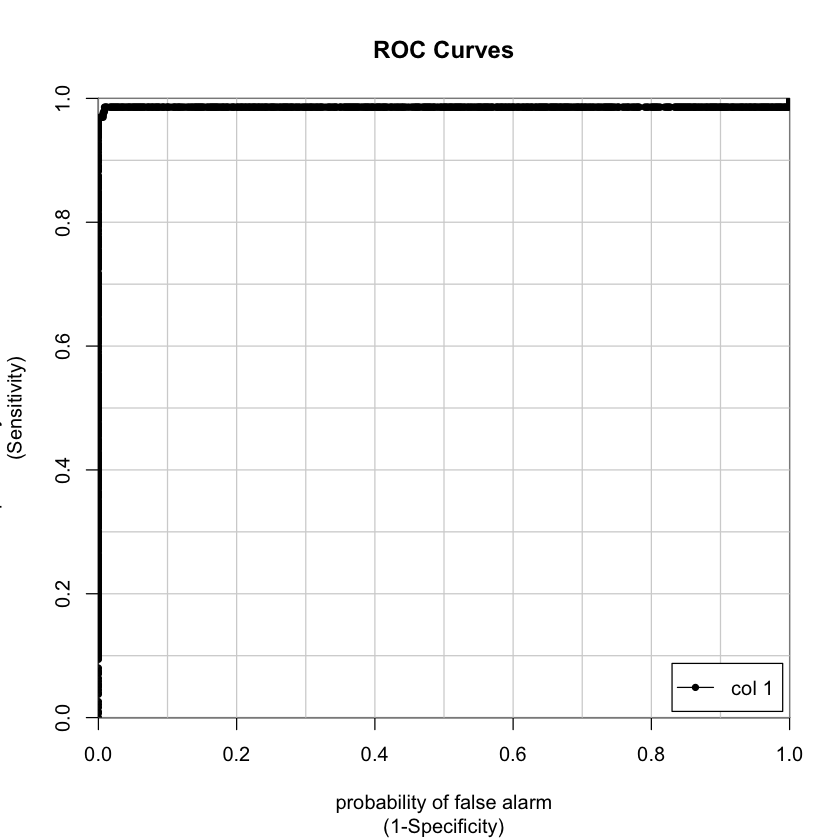

In [389]:
library(caTools) #x-axis = false +ve rate, y-axis = true +ve rate
colAUC(predictions, test$Low_HighGlucose, plotROC = TRUE)

In [418]:
auc(test$Low_HighGlucose, predictions)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.9858

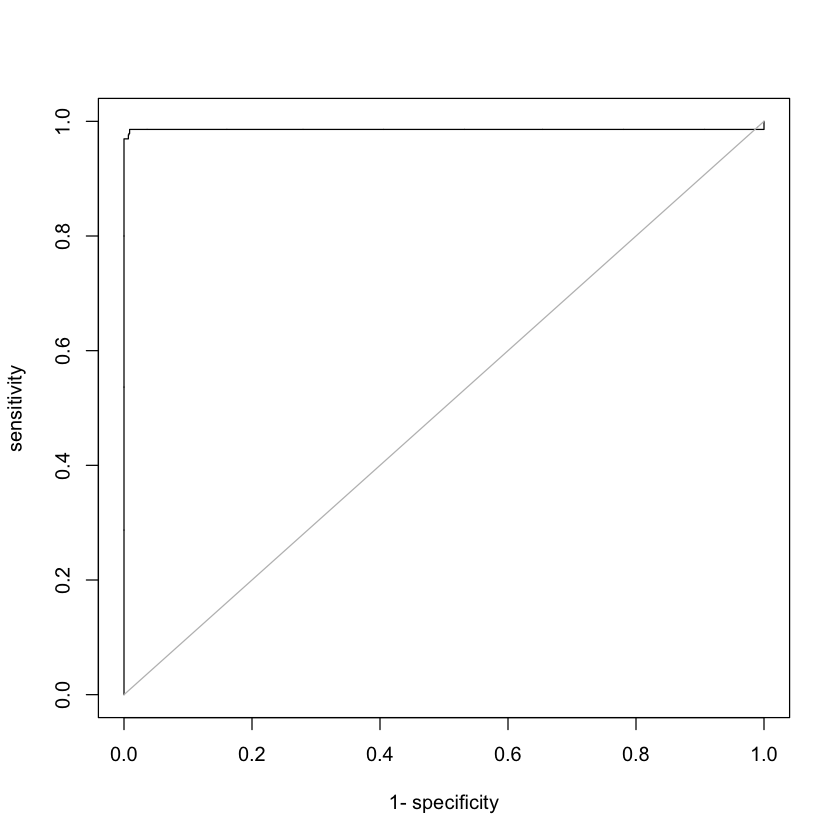

In [424]:
plot(roc(predictions, as.factor(test$Low_HighGlucose)))

In [390]:
#Create trainControl() to use AUC to tune the model parameters
myControl <- trainControl(
    method = "cv",
    number = 5,
    summaryFunction = twoClassSummary,
    classProbs = TRUE, 
    verboseIter = TRUE)

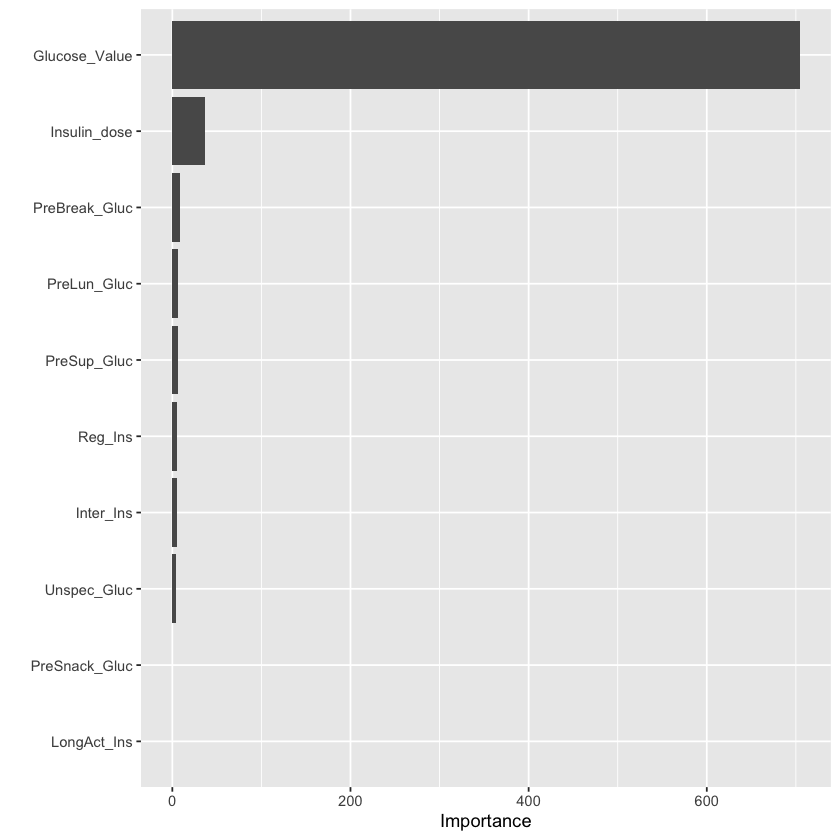

In [425]:
#Specify a Random Forest

spec2 <- rand_forest() %>%
            set_mode("classification") %>%
            set_engine("ranger", importance = "impurity")

#Train the forest
rand_model <- spec2 %>%
                fit(as.factor(Low_HighGlucose) ~ Reg_Ins + Inter_Ins + LongAct_Ins + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc + PreSnack_Gluc + Unspec_Gluc + Insulin_dose + Glucose_Value, data = train)

#Plot the variable importance
vip::vip(rand_model)

In [396]:
#Gradient boosting ensemble

#Specifying a boosted ensemble
boost_spec <- boost_tree() %>%
                set_mode("classification") %>%
                set_engine("xgboost")

boost_spec

Boosted Tree Model Specification (classification)

Computational engine: xgboost 


In [398]:
#Train the boosted ensemble model on training set
boost_model <- fit(boost_spec, as.factor(Low_HighGlucose) ~ ., data = train)

boost_model

[12:02:53] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


parsnip model object

Fit time:  1.5s 
##### xgb.Booster
raw: 12.4 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, min_child_weight = 1, subsample = 1, 
    objective = "binary:logistic"), data = x$data, nrounds = 15, 
    watchlist = x$watchlist, verbose = 0, nthread = 1)
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", min_child_weight = "1", subsample = "1", objective = "binary:logistic", nthread = "1", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 977 
niter: 15
nfeatures : 977 
evaluation_log:
    iter training_logloss
       1         0.438642
       2         0.297700
---                      
      14         0.007789
      15         0.006009

In [415]:
#COMPARISON OF GRADIENT BOOST TO A SINGLE CLASSIFIER TO COMPARE % OF AUC
#NOT WORKED - TO DISCUSS WITH B.

set.seed(100)

#FOR GRADIENT BOOST
#Specify, fit, predict and combine with training data
boost2_predictions <- boost_tree() %>%
                        set_mode("classification") %>%
                        set_engine("xgboost") %>%
                        fit(as.factor(Low_HighGlucose) ~ ., data = train) %>%
                        predict(new_data = train, type = "prob") %>%
                        bind_cols(train)
                        

boost2_predictions

#Calculate AUC
roc_auc(boost2_predictions, truth = Low_HighGlucose, estimate = .pred_yes)


#FOR SINGLE CLASSIFIER 
#Specify, fit, predict and combine with training data
classifier_predictions <- decision_tree() %>%
                        set_mode("classification") %>%
                        set_engine("rpart") %>%
                        fit(as.factor(Low_HighGlucose) ~ ., data = train) %>%
                        predict(new_data = train, type = "prob") %>%
                        bind_cols(train)

boost2_predictions

#Calculate AUC
roc_auc(classifier_predictions, truth = Low_HighGlucose, estimate = .pred_yes)



[13:15:20] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ERROR: Error in model.frame.default(mod_terms, new_data, na.action = na.action, : factor Date has new levels 06-31-1991


In [433]:
# Need to complete with predictions from Gradient boost

In [448]:
#Predict on test set
predictions2 <- predict(boost_model, new_data = test, type = "prob")

summary(predictions2)
head(predictions2)

ERROR: Error in model.frame.default(mod_terms, new_data, na.action = na.action, : factor Date has new levels 01-29-1990, 02-20-1989, 02-20-1990, 03-05-1990, 03-28-1991, 04-18-1989, 04-22-1990, 06-31-1991, 07-13-1988, 07-14-1988, 07-16-1988, 07-17-1988, 07-19-1988, 07-24-1988, 07-30-1988, 08-02-1988, 08-04-1988, 08-05-1988, 08-10-1988, 08-11-1988, 08-18-1988, 08-20-1988, 08-22-1990, 08-30-1988, 09-04-1988, 09-06-1988, 09-10-1989, 09-16-1988, 09-22-1988, 09-25-1990, 10-02-1988, 10-03-1990, 12-20-1989, 12-26-1990
